In [2]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [3]:
df_tx = pd.read_csv(Path("../../../data/processed_data/tx_evstation_progression.csv"))

# Filter the data for the specified counties
counties_to_keep = ['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County', 'Travis County']
filtered_df = df_tx[df_tx['county'].isin(counties_to_keep)]

# Get the data for "Other Texas Counties"
other_counties_df = df_tx[~df_tx['county'].isin(counties_to_keep)]
other_counties_summed = other_counties_df.groupby('year').sum().reset_index()
other_counties_summed['county'] = 'Other Texas Counties'

# Concatenate the filtered data and "Other Texas Counties" data
final_df = pd.concat([filtered_df, other_counties_summed])

# Save the cleaned data to a new CSV file
final_df.to_csv('cleaned_ev_stations_data.csv', index=False)

final_df

,year,county,ev_station_count,cumulative_ev_stations
0,2010,Dallas County,1,1
2,2011,Bexar County,5,5
6,2011,Dallas County,3,4
14,2011,Harris County,8,8
24,2011,Tarrant County,4,4
...,...,...,...,...
9,2020,Other Texas Counties,93,286
10,2021,Other Texas Counties,146,459
11,2022,Other Texas Counties,295,781
12,2023,Other Texas Counties,324,1085


In [4]:
# Save the cleaned data to a new CSV file
final_df.to_csv('tx_cleaned_ev_stations_data_topfive.csv', index=False)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))

df_tx_topfive

,year,county,ev_station_count,cumulative_ev_stations
0,2010,Dallas County,1,1
1,2011,Bexar County,5,5
2,2011,Dallas County,3,4
3,2011,Harris County,8,8
4,2011,Tarrant County,4,4
...,...,...,...,...
74,2020,Other Texas Counties,93,286
75,2021,Other Texas Counties,146,459
76,2022,Other Texas Counties,295,781
77,2023,Other Texas Counties,324,1085


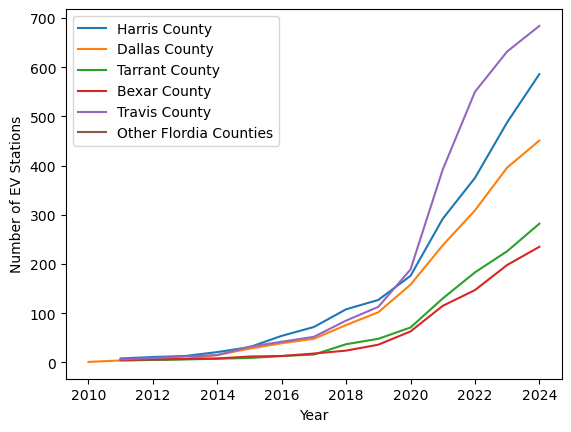

In [6]:
# Create a separate plot for each county
counties = ['Harris County', 'Dallas County', 'Tarrant County', 'Bexar County', 'Travis County','Other Flordia Counties']

fig, ax = plt.subplots()
for county in counties:
    county_data = df_tx_topfive[df_tx_topfive['county'] == county]
    ax.plot(county_data['year'], county_data['cumulative_ev_stations'], label=county)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of EV Stations')
ax.legend()

# Show the plot
plt.show()

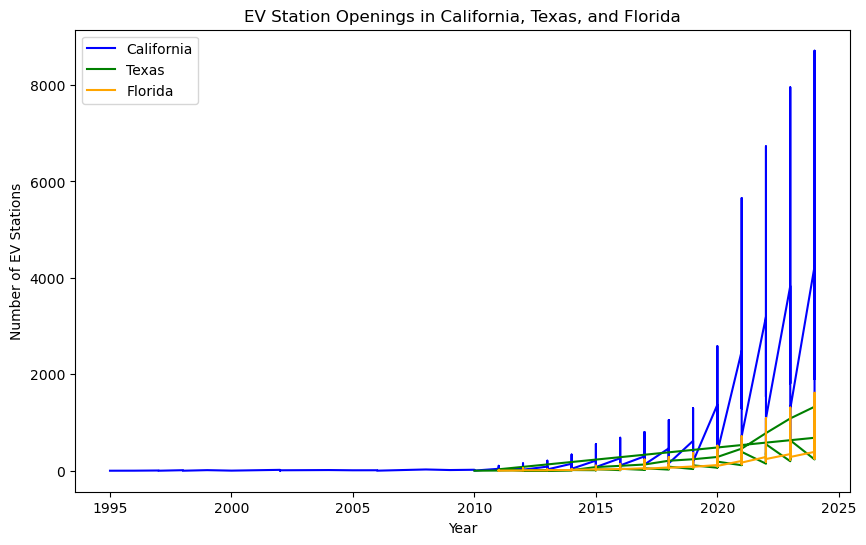

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data for California
plt.plot(df_ca_topfive['year'], df_ca_topfive['cumulative_ev_stations'], label='California', color='blue')

# Plot the data for Texas
plt.plot(df_tx_topfive['year'], df_tx_topfive['cumulative_ev_stations'], label='Texas', color='green')

# Plot the data for Florida
plt.plot(df_fl_topfive['year'], df_fl_topfive['cumulative_ev_stations'], label='Florida', color='orange')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of EV Stations')
plt.title('EV Station Openings in California, Texas, and Florida')
plt.legend()

# Show the plot
plt.show()

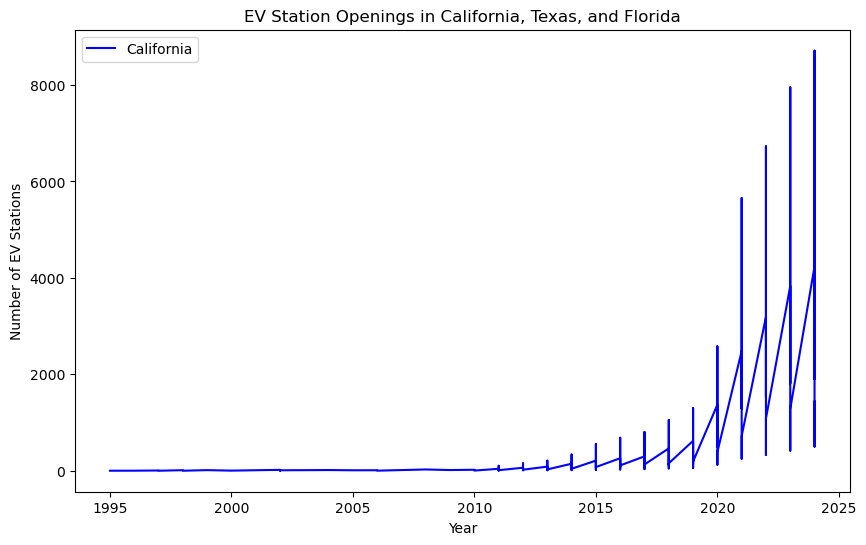

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .csv files
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data for California
plt.plot(df_ca_topfive['year'], df_ca_topfive['cumulative_ev_stations'], label='California', color='blue')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of EV Stations')
plt.title('EV Station Openings in California, Texas, and Florida')
plt.legend()

# Show the plot
plt.show()

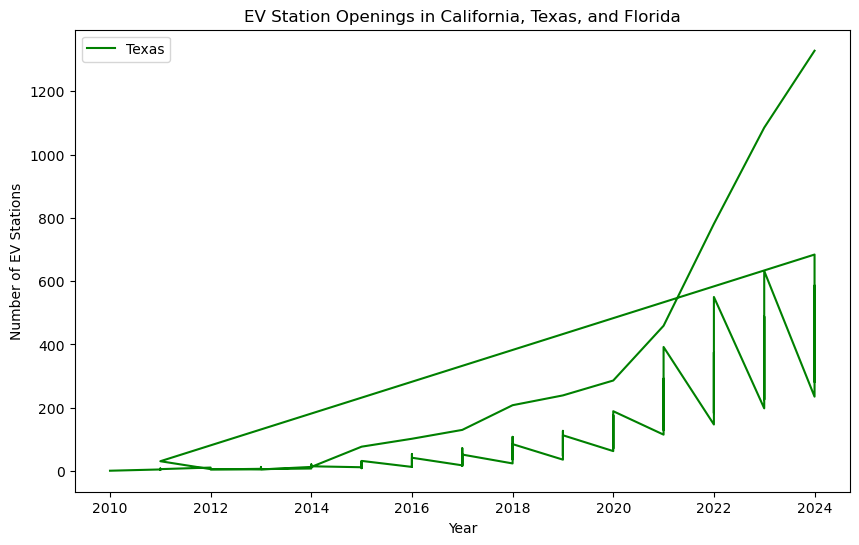

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data for Texas
plt.plot(df_tx_topfive['year'], df_tx_topfive['cumulative_ev_stations'], label='Texas', color='green')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of EV Stations')
plt.title('EV Station Openings in California, Texas, and Florida')
plt.legend()

# Show the plot
plt.show()

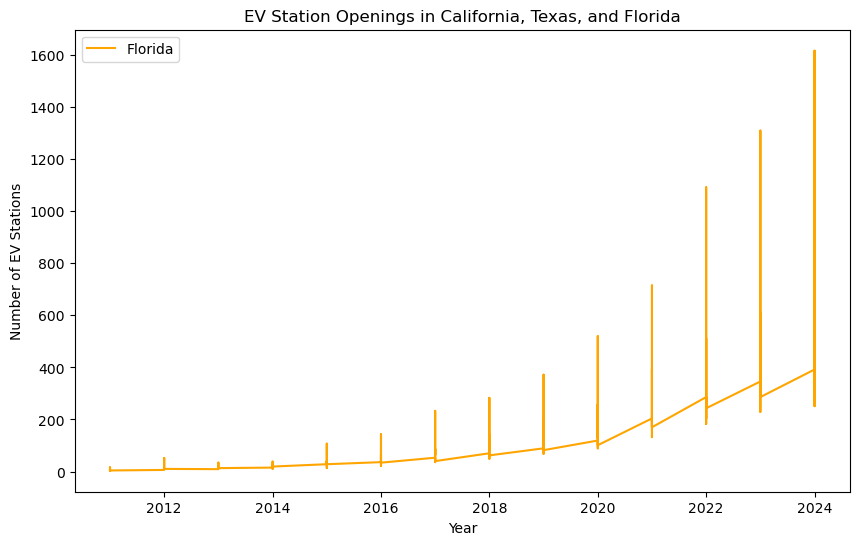

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .csv files
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))


# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data for Florida
plt.plot(df_fl_topfive['year'], df_fl_topfive['cumulative_ev_stations'], label='Florida', color='orange')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of EV Stations')
plt.title('EV Station Openings in California, Texas, and Florida')
plt.legend()

# Show the plot
plt.show()

In [12]:
import pandas as pd

# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

#Combine the data from all three dataframes into a single dataframe:
combined_data = pd.concat([df_ca_topfive, df_tx_topfive, df_fl_topfive])


#Import the Prophet library and create a Prophet model:

from fbprophet import Prophet

model = Prophet()


#Fit the model using the combined data:

model.fit(combined_data)


#Create a dataframe with the future dates for the next five years:

future_dates = model.make_future_dataframe(periods=5, freq='Y')


#Make predictions for the future dates:


forecast = model.predict(future_dates)


#Plot the forecasted data:

fig = model.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'